<a href="https://colab.research.google.com/github/anushka-kelkar/Datathon_Submission/blob/main/Training_dataset_insights_and_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

df= pd.read_csv('/content/drive/MyDrive/datathon_datasets/cleaned_dataset.csv')

READ DATASET


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   int64  
 1   Age                         1000 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 78.3+ KB
None


checking for non numeric values in dataset

In [5]:
non_numeric_values = df[~df['Age'].str.isnumeric()]
print(non_numeric_values)

     User_ID         Age Gender   Platform  Daily_Usage_Time (minutes)  \
250      251        Male     27  Instagram                       165.0   
251      252      Female     24    Twitter                        75.0   
252      253  Non-binary     29   Facebook                        85.0   
253      254      Female     33  Instagram                       145.0   
254      255        Male     31   LinkedIn                        60.0   
..       ...         ...    ...        ...                         ...   
783      784        Male     22    Twitter                        70.0   
784      785  Non-binary     29   Facebook                        75.0   
785      786      Female     28   Whatsapp                       100.0   
786      787        Male     31   Telegram                        85.0   
787      788  Non-binary     21   Snapchat                        60.0   

     Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
250            6.0                    

swapping th columns age and gender

In [6]:
mask = ~df['Age'].str.isnumeric()  # Identify rows where Age is not a number

# Swap values for affected rows
df.loc[mask, ['Age','Gender']] = df.loc[mask, ['Gender', 'Age']].values

# Verify the fix
print(df.loc[mask, ['Age','Gender']])

    Age      Gender
250  27        Male
251  24      Female
252  29  Non-binary
253  33      Female
254  31        Male
..   ..         ...
783  22        Male
784  29  Non-binary
785  28      Female
786  31        Male
787  21  Non-binary

[76 rows x 2 columns]


In [7]:
non_numeric_values = df[~df['Age'].str.isnumeric()]
print(non_numeric_values)

Empty DataFrame
Columns: [User_ID, Age, Gender, Platform, Daily_Usage_Time (minutes), Posts_Per_Day, Likes_Received_Per_Day, Comments_Received_Per_Day, Messages_Sent_Per_Day, Dominant_Emotion]
Index: []


In [8]:


df_cleaned = df.copy()

# Convert 'Age' column to numeric, coercing errors to NaN
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')

#Now you can save this cleaned dataframe to csv
df_cleaned.to_csv('/content/drive/MyDrive/datathon_datasets/df_cleaned.csv', index=False)


In [9]:
# prompt: download df_cleaned csv

from google.colab import files
files.download('/content/drive/MyDrive/datathon_datasets/df_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
print(df_cleaned.head())

   User_ID  Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0        1   25      Female  Instagram                       120.0   
1        2   30        Male    Twitter                        90.0   
2        3   22  Non-binary   Facebook                        60.0   
3        4   28      Female  Instagram                       200.0   
4        5   33        Male   LinkedIn                        45.0   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0            3.0                    45.0                       10.0   
1            5.0                    20.0                       25.0   
2            2.0                    15.0                        5.0   
3            8.0                   100.0                       30.0   
4            1.0                     5.0                        2.0   

   Messages_Sent_Per_Day Dominant_Emotion  
0                   12.0        Happiness  
1                   30.0            Anger  
2                   

correcting the data type

In [11]:

import pandas as pd
# Convert specified columns to integers, handling errors
for col in ['Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce').astype('Int64')

# Display info to verify changes
print(df_cleaned.info())

#Now you can save this cleaned dataframe to csv
df_cleaned.to_csv('/content/drive/MyDrive/datathon_datasets/df_cleaned.csv', index=False)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   Int64  
 6   Likes_Received_Per_Day      1000 non-null   Int64  
 7   Comments_Received_Per_Day   1000 non-null   Int64  
 8   Messages_Sent_Per_Day       1000 non-null   Int64  
 9   Dominant_Emotion            1000 non-null   object 
dtypes: Int64(4), float64(1), int64(2), object(3)
memory usage: 82.2+ KB
None


checking for outliers

Outliers in Daily_Usage_Time (minutes):
Empty DataFrame
Columns: [Daily_Usage_Time (minutes)]
Index: []
--------------------
Outliers in Posts_Per_Day:
     Posts_Per_Day
3                8
23               8
103              8
113              8
123              8
203              8
213              8
223              8
303              8
313              8
323              8
403              8
413              8
423              8
503              8
513              8
523              8
603              8
613              8
623              8
703              8
713              8
723              8
803              8
813              8
823              8
903              8
913              8
923              8
--------------------
Outliers in Likes_Received_Per_Day:
     Likes_Received_Per_Day
103                     110
203                     110
303                     110
403                     110
503                     110
603                     110
703                     1

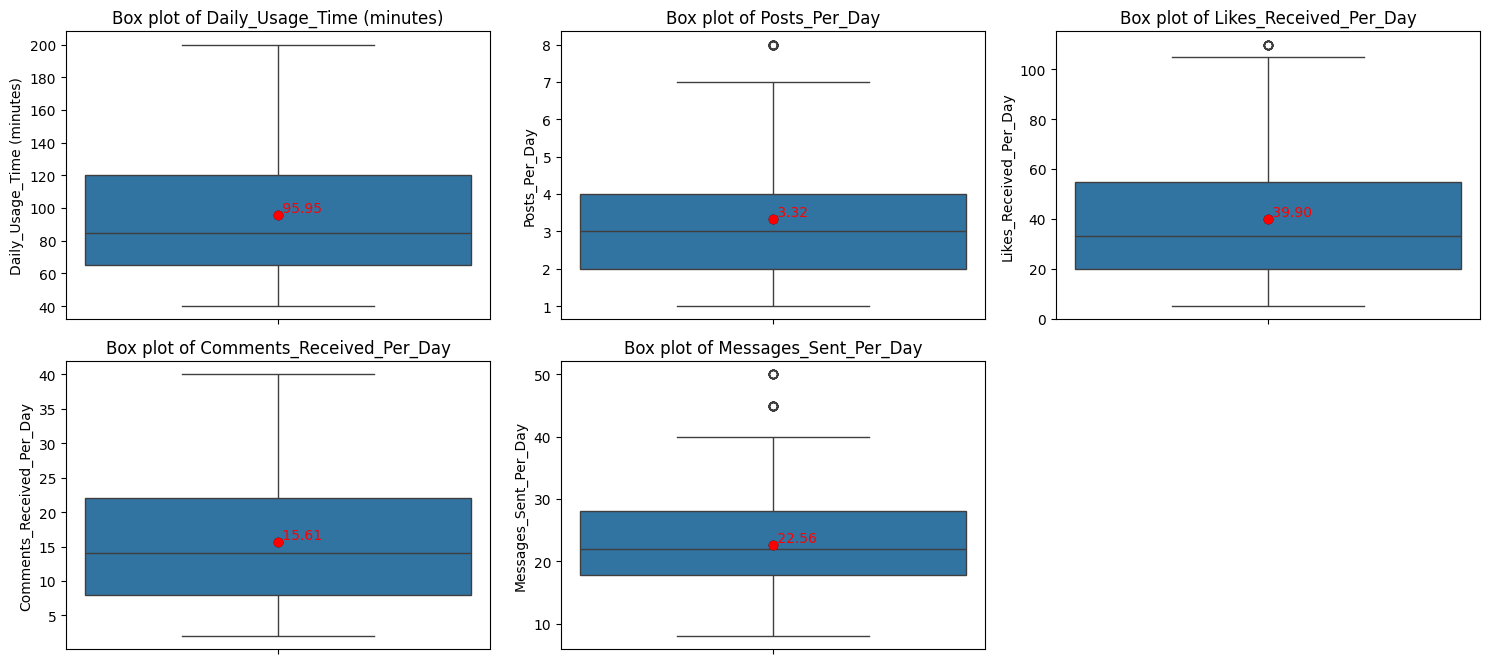

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns to exclude from box plot analysis
exclude_cols = ['User_ID', 'Age', 'Gender', 'Platform', 'Dominant_Emotion']

# Select columns for analysis, excluding specified columns
columns_to_plot = [col for col in df_cleaned.columns if col not in exclude_cols]

# Create box plots for each selected column
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=df_cleaned[col], showmeans=True, meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"})

    # Calculate mean and annotate it on the plot
    mean_value = df_cleaned[col].mean()
    plt.scatter(0, mean_value, color='red', zorder=3, label=f'Mean: {mean_value:.2f}')
    plt.text(0, mean_value, f' {mean_value:.2f}', verticalalignment='bottom', color='red', fontsize=10)

    plt.title(f'Box plot of {col}')

    # Calculate quartiles and IQR
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]

    # Print outlier information (optional)
    print(f"Outliers in {col}:")
    print(outliers[[col]])
    print("-" * 20)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


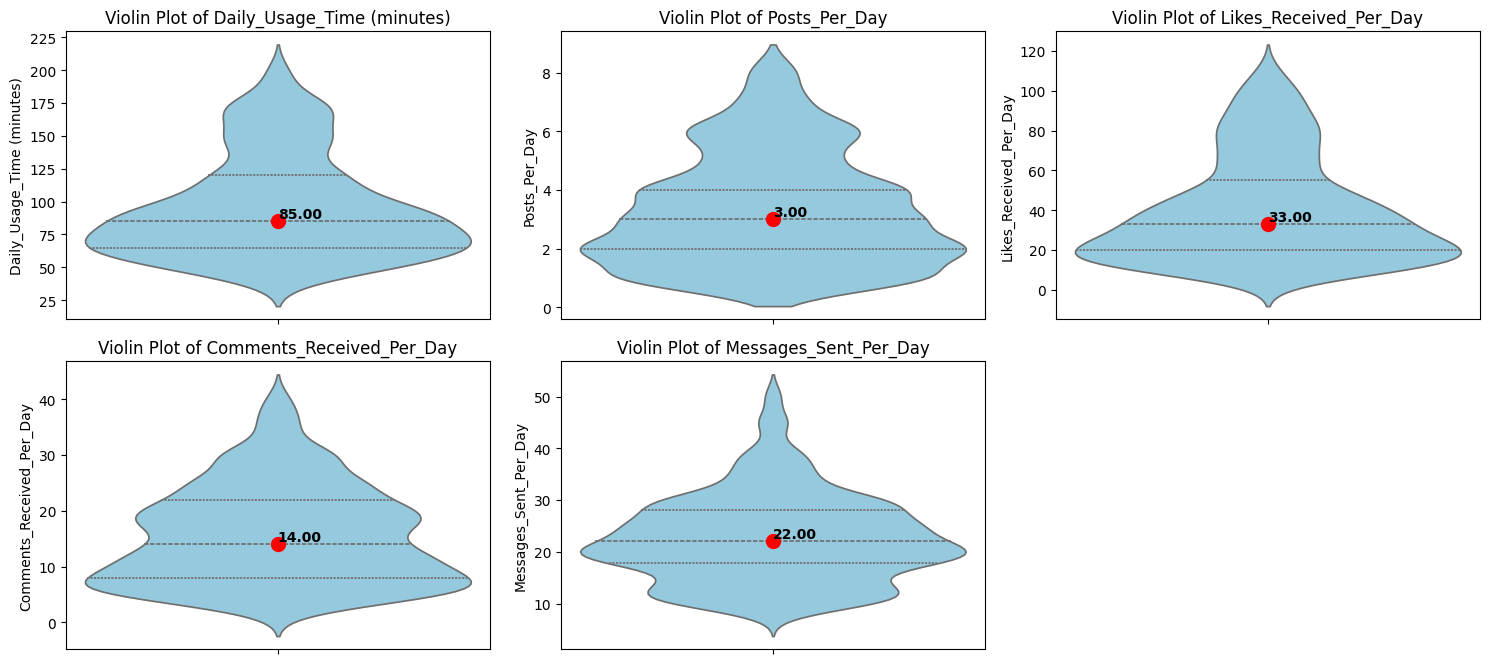

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 3, i + 1)

    # Create violin plot
    sns.violinplot(y=df_cleaned[col], inner="quartile", color="skyblue")

    # Compute median
    median_value = df_cleaned[col].median()

    # Highlight the median with a scatter point
    plt.scatter(0, median_value, color='red', s=100, label="Median", zorder=3)

    # Display median value as text
    plt.text(0, median_value, f'{median_value:.2f}',
             horizontalalignment='left', verticalalignment='bottom',
             fontsize=10, fontweight='bold', color='black')

    plt.title(f'Violin Plot of {col}')

plt.tight_layout()
plt.show()



above box plot indicates the outliers in attributes which were all from the platform instagram

In [13]:

# Calculate quartiles and IQR for 'Posts_Per_Day'
Q1_posts = df_cleaned['Posts_Per_Day'].quantile(0.25)
Q3_posts = df_cleaned['Posts_Per_Day'].quantile(0.75)
IQR_posts = Q3_posts - Q1_posts

# Identify outliers for 'Posts_Per_Day'
lower_bound_posts = Q1_posts - 1.5 * IQR_posts
upper_bound_posts = Q3_posts + 1.5 * IQR_posts
outliers_posts = df_cleaned[(df_cleaned['Posts_Per_Day'] < lower_bound_posts) | (df_cleaned['Posts_Per_Day'] > upper_bound_posts)]

# Print the 'Platform' values for the outlier user IDs
print("Platform of users with outlier 'Posts_Per_Day':")
print(outliers_posts[['User_ID', 'Platform']])


Platform of users with outlier 'Posts_Per_Day':
     User_ID   Platform
3          4  Instagram
23        24  Instagram
103      104  Instagram
113      114  Instagram
123      124  Instagram
203      204  Instagram
213      214  Instagram
223      224  Instagram
303      304  Instagram
313      314  Instagram
323      324  Instagram
403      404  Instagram
413      414  Instagram
423      424  Instagram
503      504  Instagram
513      514  Instagram
523      524  Instagram
603      604  Instagram
613      614  Instagram
623      624  Instagram
703      704  Instagram
713      714  Instagram
723      724  Instagram
803      804  Instagram
813      814  Instagram
823      824  Instagram
903      904  Instagram
913      914  Instagram
923      924  Instagram


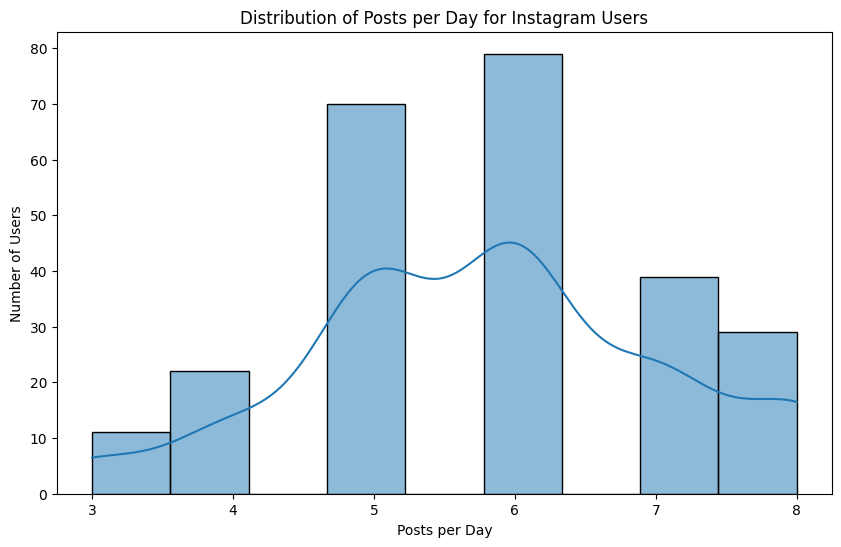

In [14]:

# Filter data for Instagram users
instagram_users = df_cleaned[df_cleaned['Platform'] == 'Instagram']

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(instagram_users['Posts_Per_Day'], kde=True)
plt.title('Distribution of Posts per Day for Instagram Users')
plt.xlabel('Posts per Day')
plt.ylabel('Number of Users')
plt.show()


outliers from platform instagram

In [15]:


# Calculate quartiles and IQR for 'Likes_Received_Per_Day'
Q1_likes = df_cleaned['Likes_Received_Per_Day'].quantile(0.25)
Q3_likes = df_cleaned['Likes_Received_Per_Day'].quantile(0.75)
IQR_likes = Q3_likes - Q1_likes

# Identify outliers for 'Likes_Received_Per_Day'
lower_bound_likes = Q1_likes - 1.5 * IQR_likes
upper_bound_likes = Q3_likes + 1.5 * IQR_likes
outliers_likes = df_cleaned[(df_cleaned['Likes_Received_Per_Day'] < lower_bound_likes) | (df_cleaned['Likes_Received_Per_Day'] > upper_bound_likes)]

# Print the 'Platform' values for the outlier user IDs
print("Platform of users with outlier 'Likes_Received_Per_Day':")
print(outliers_likes[['User_ID', 'Platform']])


Platform of users with outlier 'Likes_Received_Per_Day':
     User_ID   Platform
103      104  Instagram
203      204  Instagram
303      304  Instagram
403      404  Instagram
503      504  Instagram
603      604  Instagram
703      704  Instagram
803      804  Instagram
903      904  Instagram


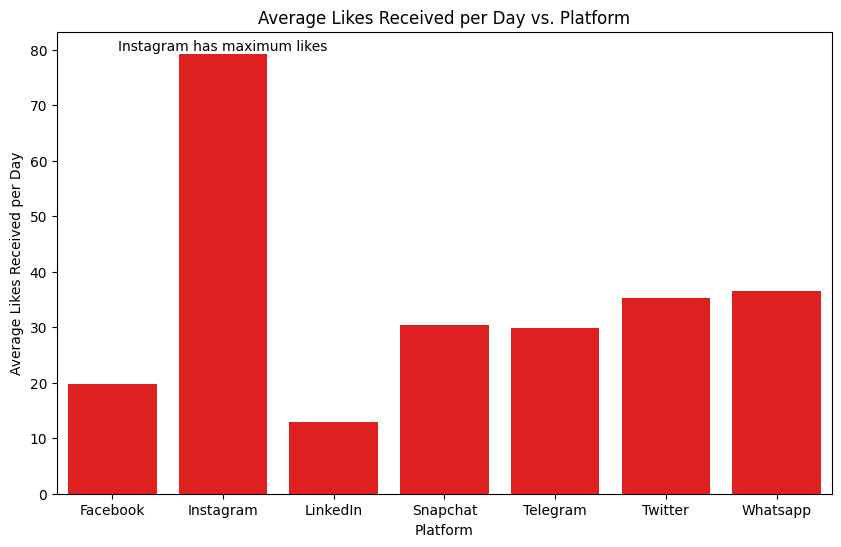

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_cleaned' is your DataFrame
# Group data by platform and calculate the mean likes received per day
platform_likes = df_cleaned.groupby('Platform')['Likes_Received_Per_Day'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_likes.index, y=platform_likes.values, color='red')
plt.xlabel('Platform')
plt.ylabel('Average Likes Received per Day')
plt.title('Average Likes Received per Day vs. Platform')

# Annotate the maximum likes
max_platform = platform_likes.idxmax()
max_likes = platform_likes.max()
plt.text(platform_likes.index.get_loc(max_platform), max_likes,
         f'Instagram has maximum likes', ha='center', va='bottom', color='black')

plt.show()


In [22]:

# Calculate quartiles and IQR for 'Messages_Received_Per_Day'
Q1_messages = df_cleaned['Messages_Sent_Per_Day'].quantile(0.25)
Q3_messages = df_cleaned['Messages_Sent_Per_Day'].quantile(0.75)
IQR_messages = Q3_messages - Q1_messages

# Identify outliers for 'Messages_Received_Per_Day'
lower_bound_messages = Q1_messages - 1.5 * IQR_messages
upper_bound_messages = Q3_messages + 1.5 * IQR_messages
outliers_messages = df_cleaned[(df_cleaned['Messages_Sent_Per_Day'] < lower_bound_messages) | (df_cleaned['Messages_Sent_Per_Day'] > upper_bound_messages)]

# Print the 'Platform' values for the outlier user IDs
print("Platform of users with outlier 'Messages_Sent_Per_Day':")
print(outliers_messages[['User_ID', 'Platform']])


Platform of users with outlier 'Messages_Sent_Per_Day':
     User_ID   Platform
3          4  Instagram
23        24  Instagram
103      104  Instagram
113      114  Instagram
123      124  Instagram
203      204  Instagram
213      214  Instagram
223      224  Instagram
303      304  Instagram
313      314  Instagram
323      324  Instagram
403      404  Instagram
413      414  Instagram
423      424  Instagram
503      504  Instagram
513      514  Instagram
523      524  Instagram
603      604  Instagram
613      614  Instagram
623      624  Instagram
703      704  Instagram
713      714  Instagram
723      724  Instagram
803      804  Instagram
813      814  Instagram
823      824  Instagram
903      904  Instagram
913      914  Instagram
923      924  Instagram


In [ ]:
df_cleaned.to_csv('data_cleanedfinal.csv', index=False)

# Provide a download link (for Google Colab)
files.download('data_cleanedfinal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

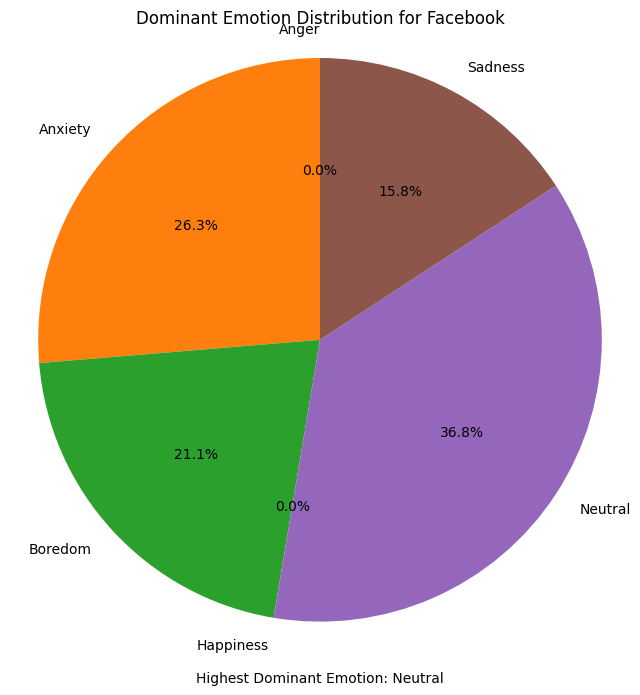

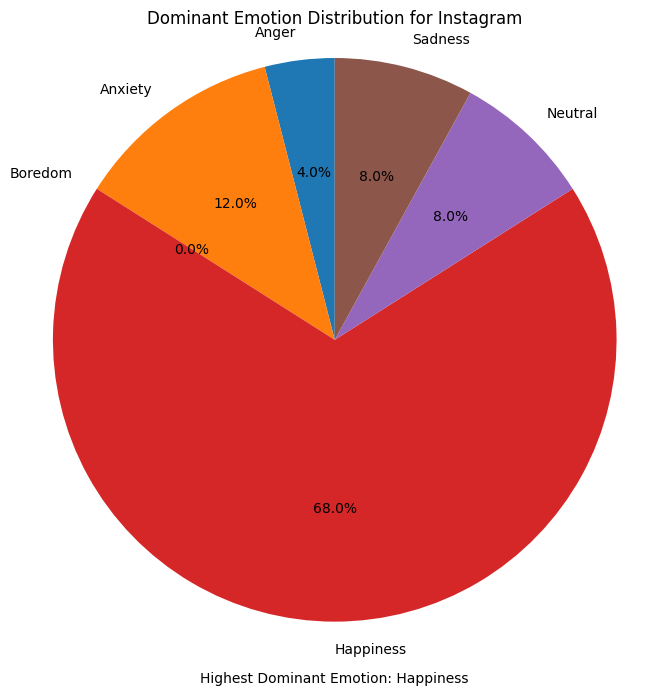

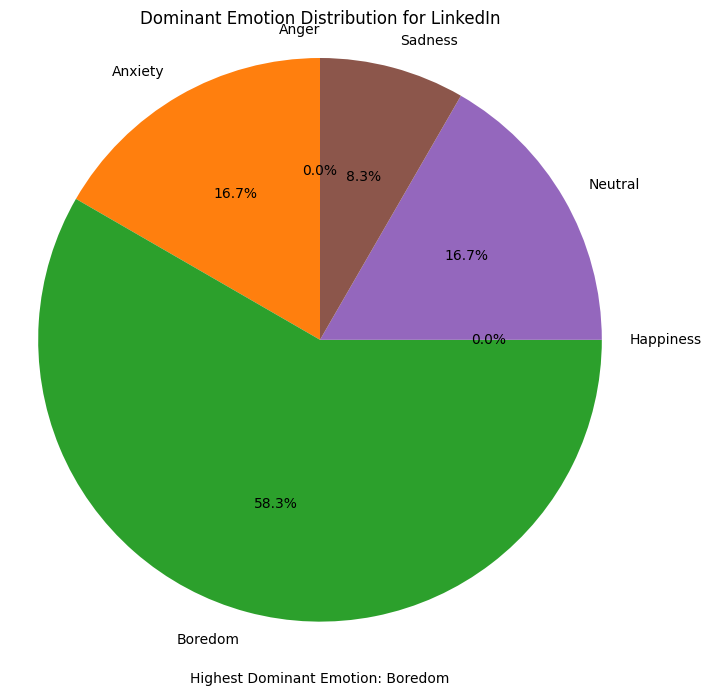

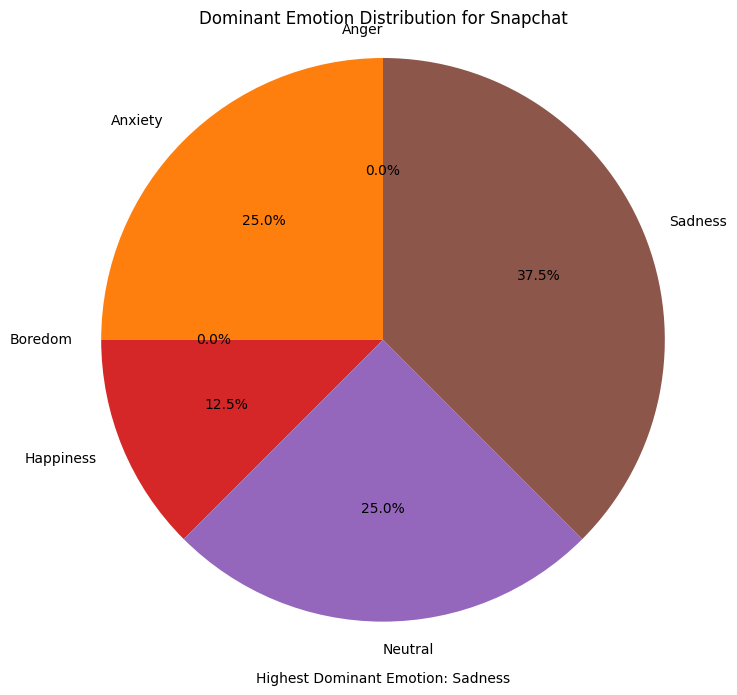

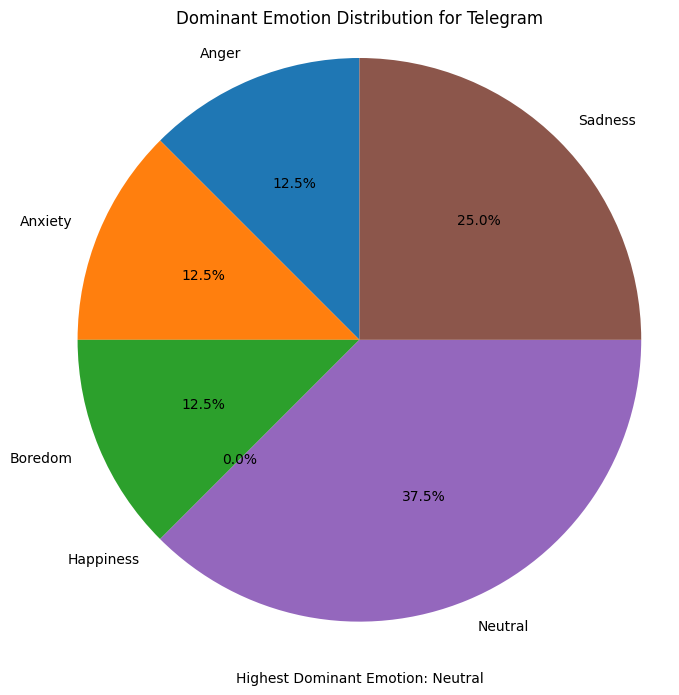

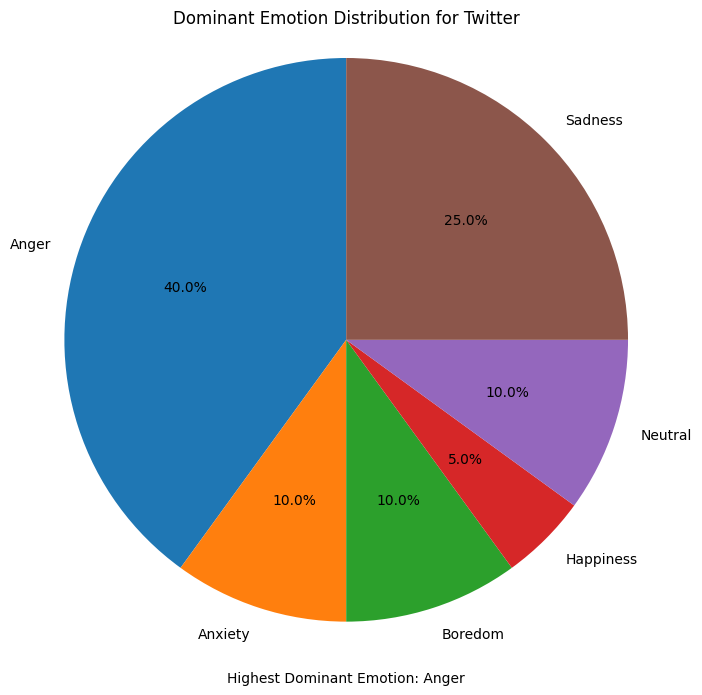

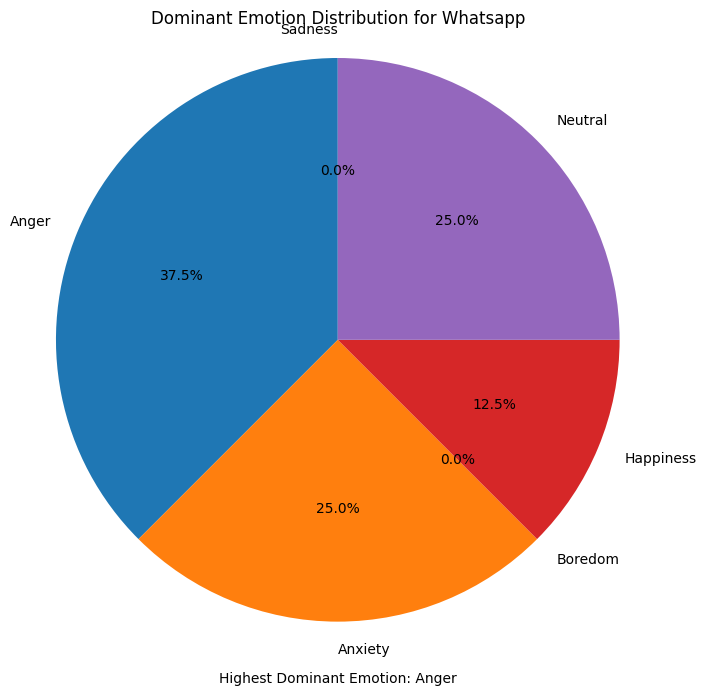

In [24]:
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is your DataFrame
platform_emotion_counts = df_cleaned.groupby(['Platform', 'Dominant_Emotion']).size().unstack(fill_value=0)

# Plotting the pie chart for each platform
for platform in platform_emotion_counts.index:
    platform_data = platform_emotion_counts.loc[platform]

    plt.figure(figsize=(8, 8))
    plt.pie(platform_data, labels=platform_data.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Dominant Emotion Distribution for {platform}')

    # Find the dominant emotion for the current platform
    dominant_emotion = platform_data.idxmax()
    plt.text(0, -1.2, f"Highest Dominant Emotion: {dominant_emotion}", ha='center', va='center', fontsize=10)

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


individual dominant emotions for each platforms

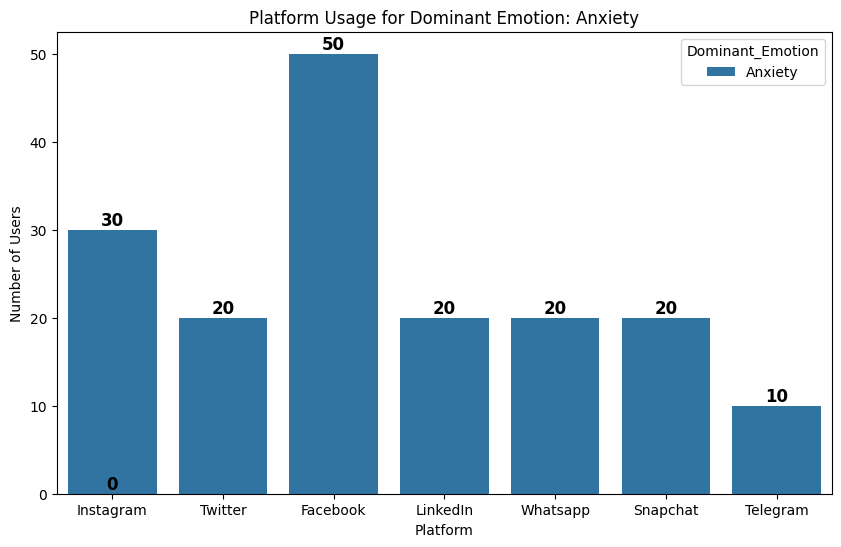

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Platform', hue='Dominant_Emotion',
                   data=df_cleaned[df_cleaned['Dominant_Emotion'] == 'Anxiety'])

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize the plot
plt.title('Platform Usage for Dominant Emotion: Anxiety')
plt.xlabel('Platform')
plt.ylabel('Number of Users')

plt.show()



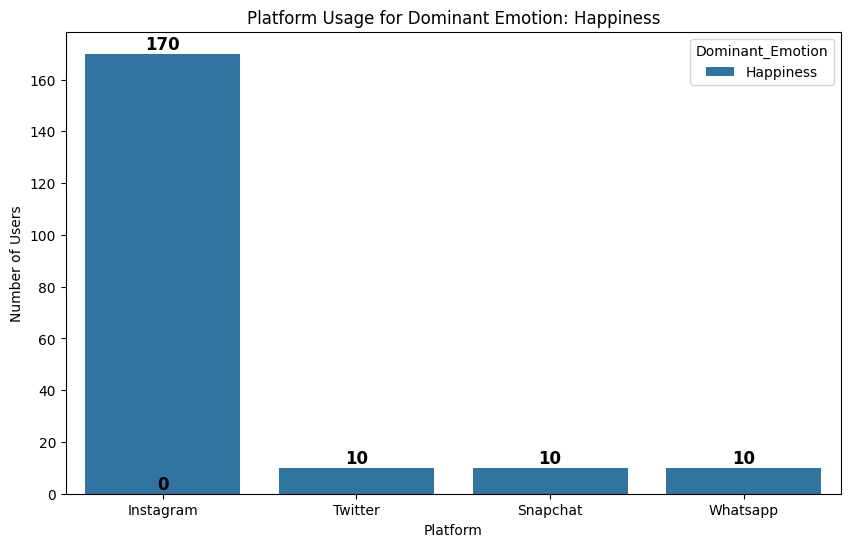

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Platform', hue='Dominant_Emotion',
                   data=df_cleaned[df_cleaned['Dominant_Emotion'] == 'Happiness'])

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert height to integer
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the top of the bar
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize the plot
plt.title('Platform Usage for Dominant Emotion: Happiness')
plt.xlabel('Platform')
plt.ylabel('Number of Users')

plt.show()



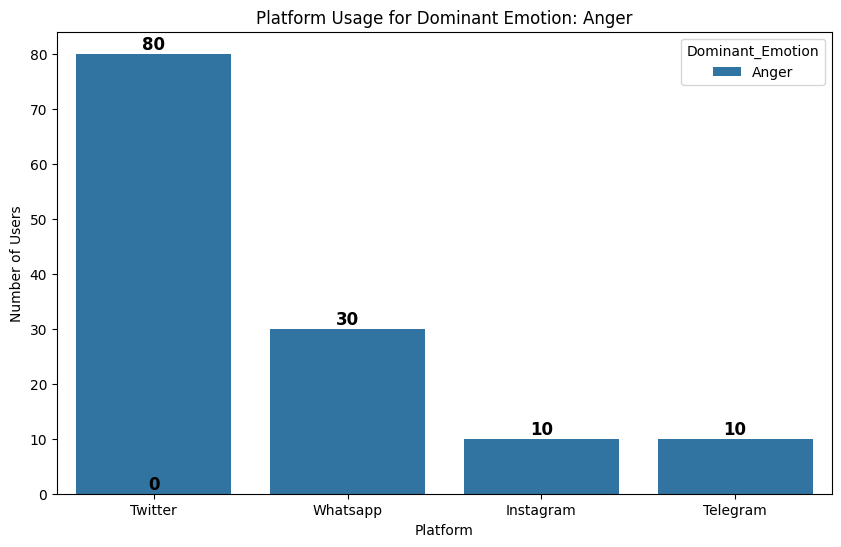

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Platform', hue='Dominant_Emotion',
                   data=df_cleaned[df_cleaned['Dominant_Emotion'] == 'Anger'])

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert height to integer
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the top of the bar
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize the plot
plt.title('Platform Usage for Dominant Emotion: Anger')
plt.xlabel('Platform')
plt.ylabel('Number of Users')

plt.show()



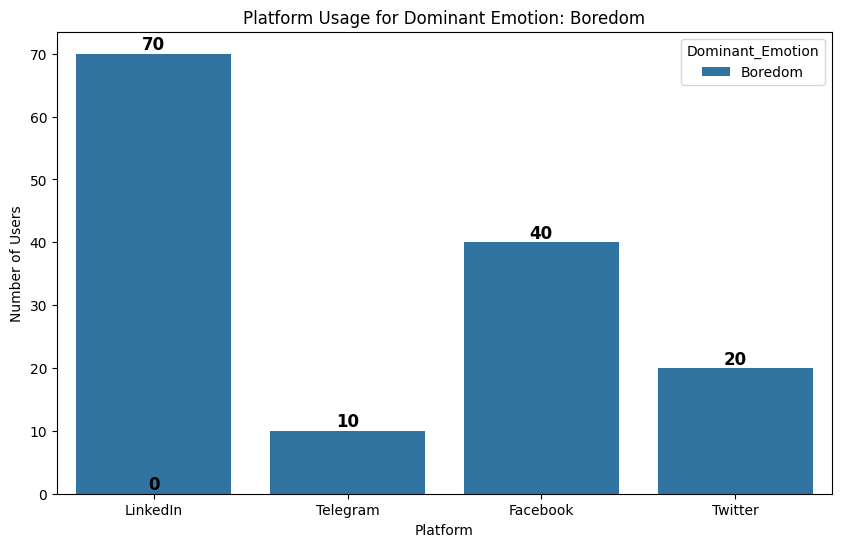

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Platform', hue='Dominant_Emotion',
                   data=df_cleaned[df_cleaned['Dominant_Emotion'] == 'Boredom'])

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert height to integer
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the top of the bar
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize the plot
plt.title('Platform Usage for Dominant Emotion: Boredom')
plt.xlabel('Platform')
plt.ylabel('Number of Users')

plt.show()



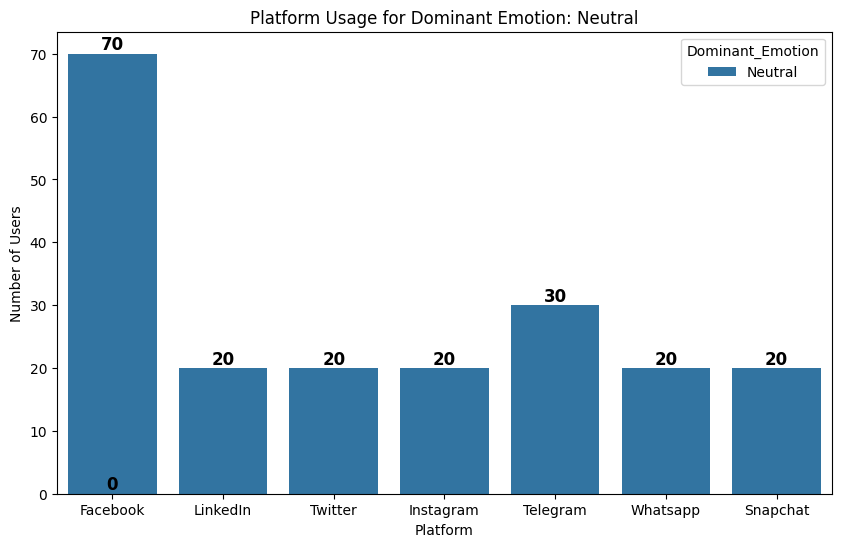

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Platform', hue='Dominant_Emotion',
                   data=df_cleaned[df_cleaned['Dominant_Emotion'] == 'Neutral'])

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert height to integer
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the top of the bar
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize the plot
plt.title('Platform Usage for Dominant Emotion: Neutral')
plt.xlabel('Platform')
plt.ylabel('Number of Users')

plt.show()



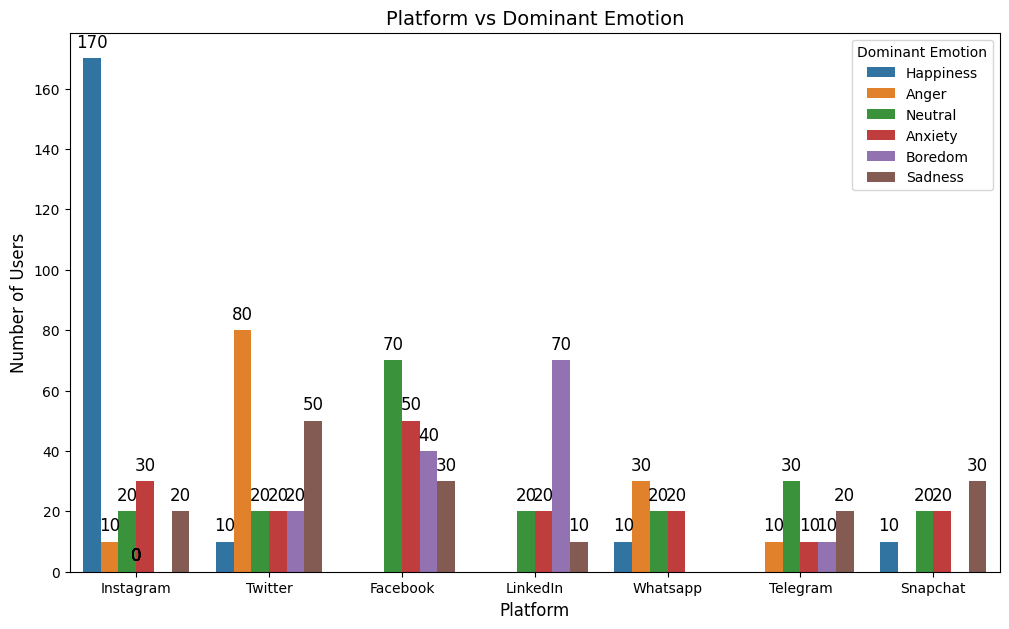

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the countplot
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='Platform', hue='Dominant_Emotion', data=df_cleaned)

# Add values above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Titles and labels
plt.title('Platform vs Dominant Emotion', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend(title='Dominant Emotion')

plt.show()


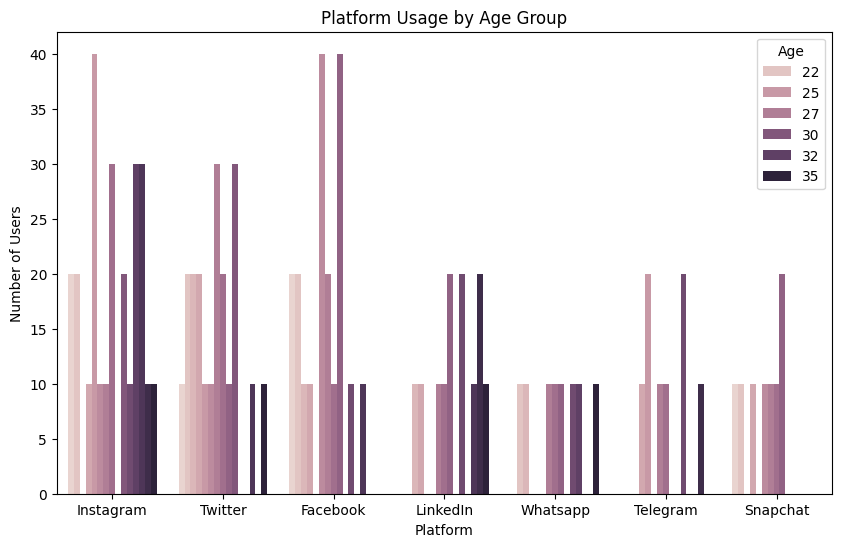

In [ ]:

# Assuming df_cleaned is already loaded as in the provided code
plt.figure(figsize=(10, 6))
sns.countplot(x='Platform', hue='Age', data=df_cleaned)
plt.title('Platform Usage by Age Group')
plt.xlabel('Platform')
plt.ylabel('Number of Users')
plt.show()


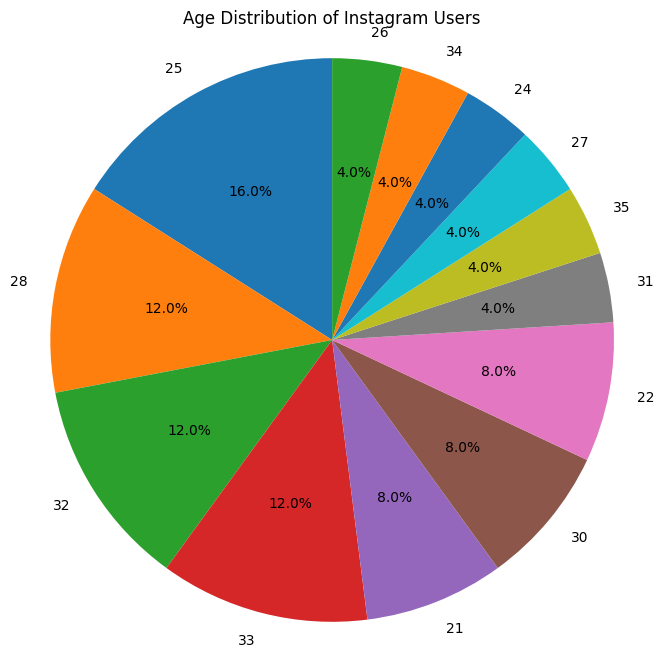

In [ ]:

instagram_df = df_cleaned[df_cleaned['Platform'] == 'Instagram']

# Group Instagram users by age and count occurrences
age_counts = instagram_df['Age'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution of Instagram Users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


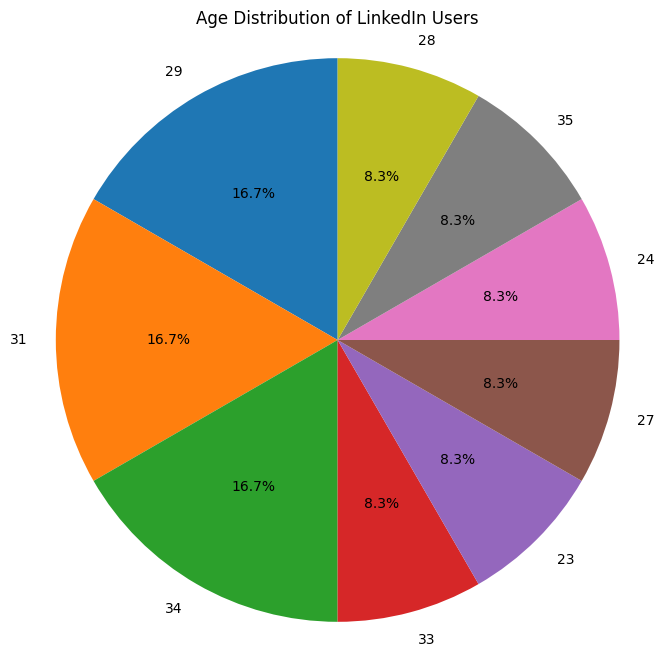

In [ ]:

# Filter data for LinkedIn users
linkedin_df = df_cleaned[df_cleaned['Platform'] == 'LinkedIn']

# Group LinkedIn users by age and count occurrences
age_counts = linkedin_df['Age'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution of LinkedIn Users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


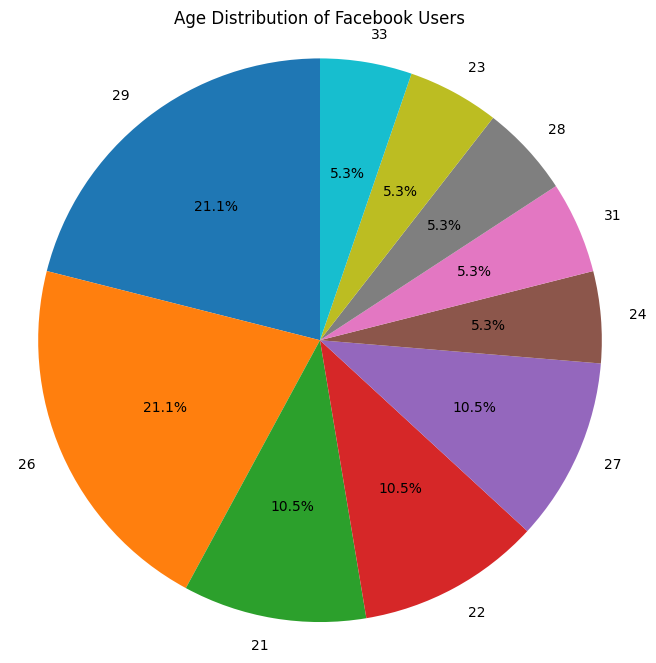

In [ ]:

# Filter data for Facebook users
facebook_df = df_cleaned[df_cleaned['Platform'] == 'Facebook']

# Group Facebook users by age and count occurrences
age_counts = facebook_df['Age'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution of Facebook Users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


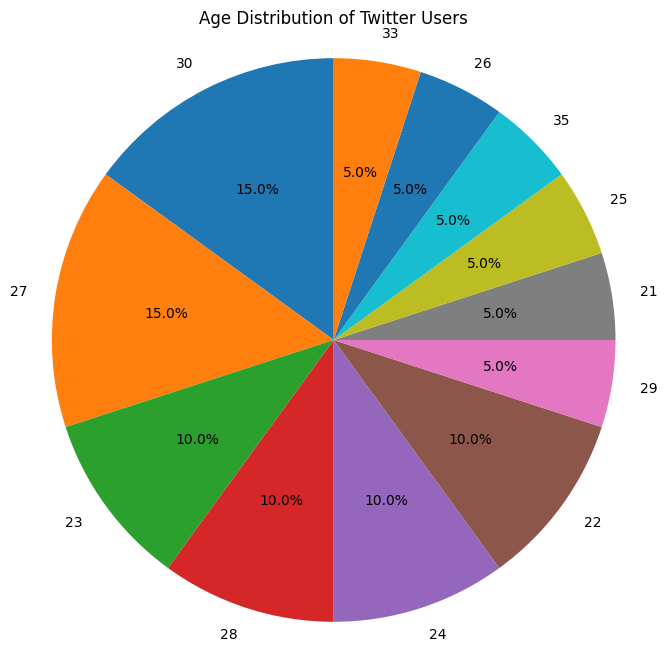

In [ ]:

# Filter data for Twitter users
twitter_df = df_cleaned[df_cleaned['Platform'] == 'Twitter']

# Group Twitter users by age and count occurrences
age_counts = twitter_df['Age'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution of Twitter Users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


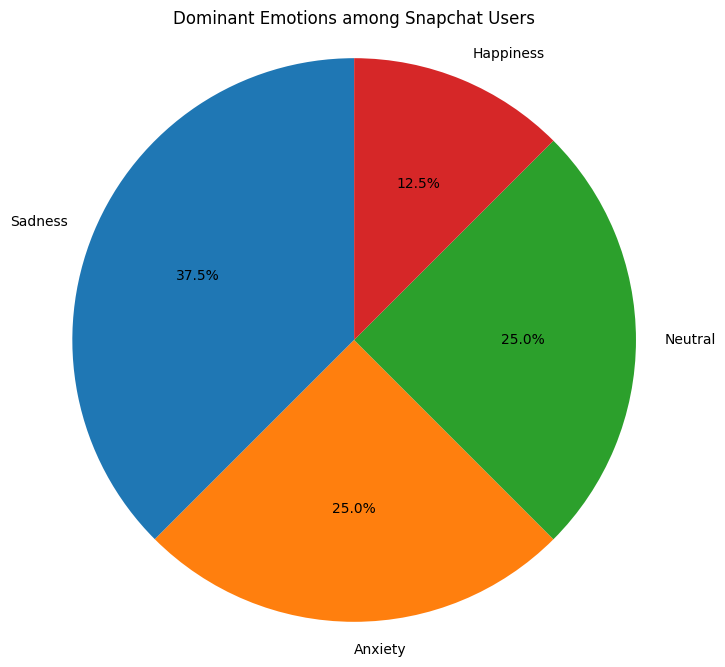

In [ ]:
# Filter data for Snapchat users
snapchat_df = df_cleaned[df_cleaned['Platform'] == 'Snapchat']

# Group Snapchat users by dominant emotion and count occurrences
emotion_counts = snapchat_df['Dominant_Emotion'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Dominant Emotions among Snapchat Users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**ENCODING WITH DUMMY VARIABLES**

In [ ]:
import pandas as pd

# Define mappings
gender_mapping = {'Male': 1, 'Female': 2, 'Non-binary': 3}
platform_mapping = {'Instagram': 1, 'Whatsapp': 2, 'LinkedIn': 3, 'Facebook': 4, 'Twitter': 5, 'Snapchat': 6, 'Telegram': 7}
emotion_mapping = {'Anxiety': 1, 'Happiness': 2, 'Anger': 3, 'Boredom': 4, 'Neutral': 5, 'Sadness': 6}


# Create a copy of df_cleaned to store encoded values
df_encoded = df_cleaned.copy()

# Apply the mappings to the respective columns
df_encoded['Gender'] = df_encoded['Gender'].map(gender_mapping)
df_encoded['Platform'] = df_encoded['Platform'].map(platform_mapping)
df_encoded['Dominant_Emotion'] = df_encoded['Dominant_Emotion'].map(emotion_mapping)

# Save the encoded DataFrame to CSV
df_encoded.to_csv('/content/drive/MyDrive/datathon_datasets/df_cleaned_encoded.csv', index=False)

# If using Google Colab, download the file
from google.colab import files
files.download('/content/drive/MyDrive/datathon_datasets/df_cleaned_encoded.csv')

# Display the first few rows
print(df_encoded.head())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   User_ID  Age  Gender  Platform  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0        1   25       2         1                       120.0              3   
1        2   30       1         5                        90.0              5   
2        3   22       3         4                        60.0              2   
3        4   28       2         1                       200.0              8   
4        5   33       1         3                        45.0              1   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                      45                         10                     12   
1                      20                         25                     30   
2                      15                          5                     20   
3                     100                         30                     50   
4                       5                          2                     10   

   Dominant_Emotion  
0                 2  


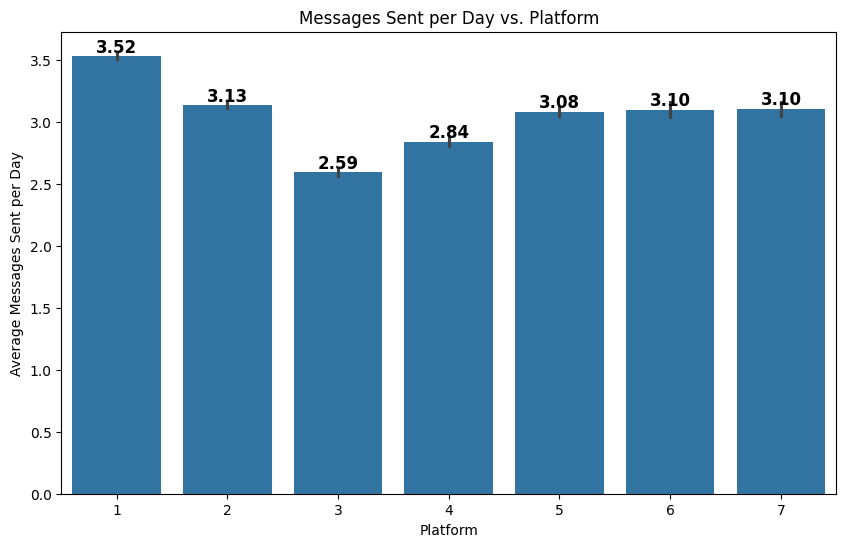

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Platform', y='Messages_Sent_Per_Day_log', data=df_encoded)

# Annotate bars with values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format value to 2 decimal places
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the top of the bar
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize the plot
plt.title('Messages Sent per Day vs. Platform')
plt.xlabel('Platform')
plt.ylabel('Average Messages Sent per Day')

plt.show()



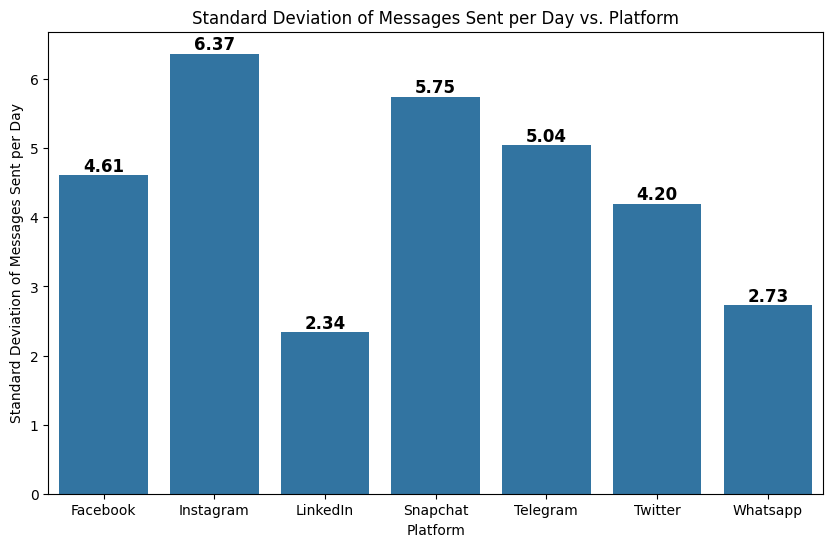

,Messages_Sent_Per_Day
Platform,
Facebook,4.606353
Instagram,6.368372
LinkedIn,2.336398
Snapchat,5.74649
Telegram,5.042541
Twitter,4.19872
Whatsapp,2.729933


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the standard deviation of 'Messages_Sent_Per_Day' for each platform
std_dev_by_platform = df_cleaned.groupby('Platform')['Messages_Sent_Per_Day'].std()

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=std_dev_by_platform.index, y=std_dev_by_platform.values)

# Annotate each bar with the standard deviation value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format value to 2 decimal places
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize the plot
plt.title('Standard Deviation of Messages Sent per Day vs. Platform')
plt.xlabel('Platform')
plt.ylabel('Standard Deviation of Messages Sent per Day')

plt.show()

# Print the standard deviation values for each platform
std_dev_by_platform



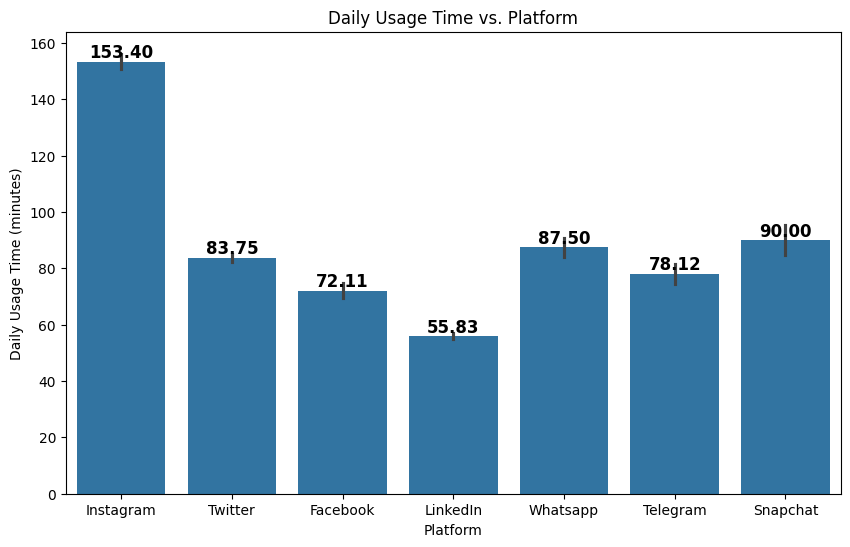

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=df_cleaned)

# Annotate each bar with the usage time value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format to 2 decimal places
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize the plot
plt.title('Daily Usage Time vs. Platform')
plt.xlabel('Platform')
plt.ylabel('Daily Usage Time (minutes)')

plt.show()



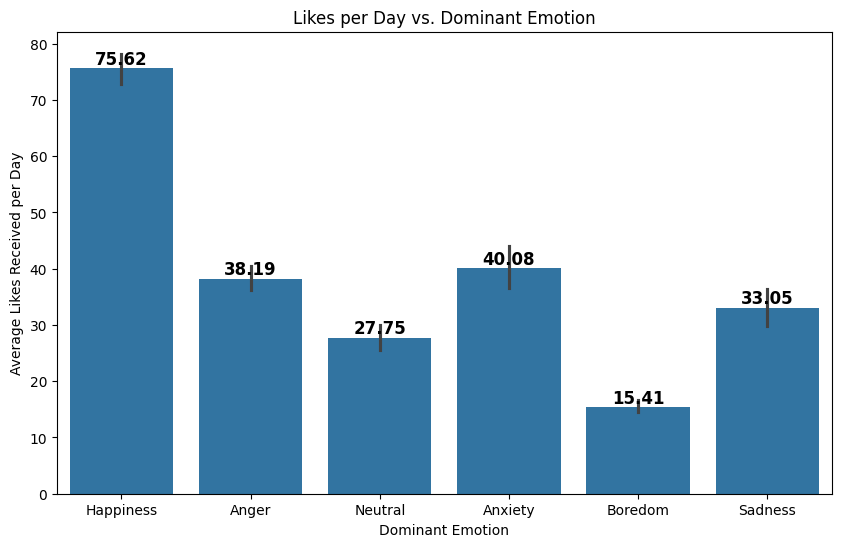

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Dominant_Emotion', y='Likes_Received_Per_Day', data=df_cleaned)

# Annotate each bar with the likes count
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format to 2 decimal places
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize the plot
plt.title('Likes per Day vs. Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Likes Received per Day')

plt.show()


Skewness before: 0.8363017396478977


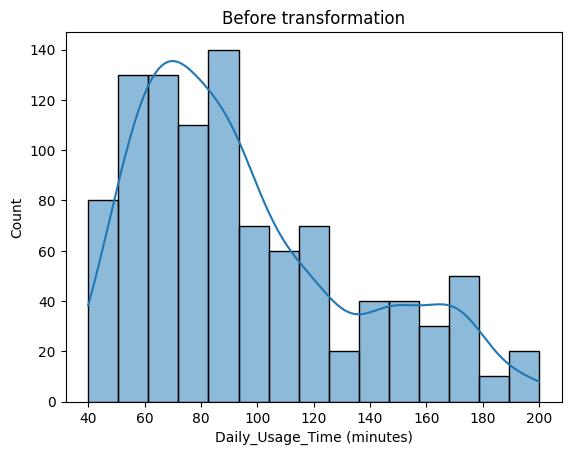

Skewness after: 0.22216043159293347


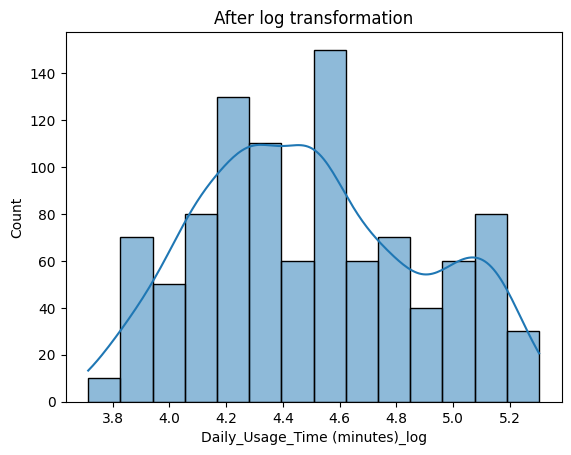

In [ ]:
print("Skewness before:", df_encoded['Daily_Usage_Time (minutes)'].skew())

# Plot original distribution
sns.histplot(df_encoded['Daily_Usage_Time (minutes)'], kde=True)
plt.title("Before transformation")
plt.show()

# Apply log transformation (log1p handles zero and small values safely)
df_encoded['Daily_Usage_Time (minutes)_log'] = np.log1p(df_encoded['Daily_Usage_Time (minutes)'])

# Check skewness after
print("Skewness after:", df_encoded['Daily_Usage_Time (minutes)_log'].skew())

# Plot transformed distribution
sns.histplot(df_encoded['Daily_Usage_Time (minutes)_log'], kde=True)
plt.title("After log transformation")
plt.show()



Skewness before: 0.6407594597958943


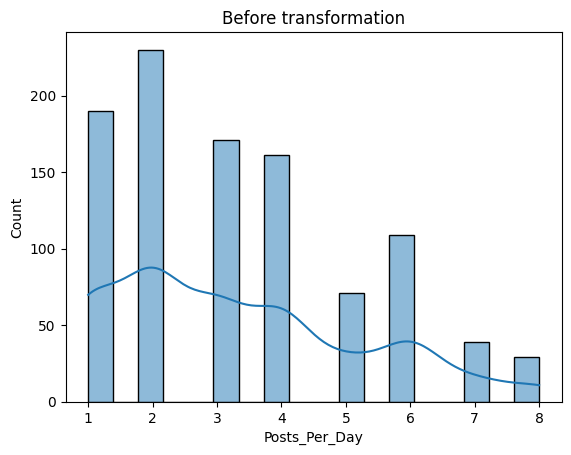

Skewness after: -0.017774541499549934


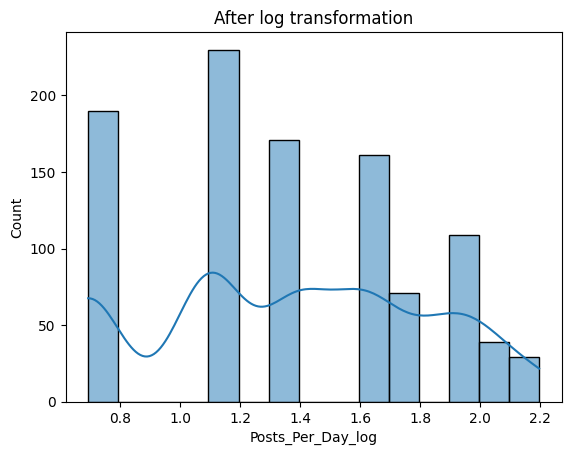

In [ ]:
print("Skewness before:", df_encoded['Posts_Per_Day'].skew())

# Plot original distribution
sns.histplot(df_encoded['Posts_Per_Day'], kde=True)
plt.title("Before transformation")
plt.show()

# Apply log transformation (log1p handles zero and small values safely)
df_encoded['Posts_Per_Day_log'] = np.log1p(df_encoded['Posts_Per_Day'])

# Check skewness after
print("Skewness after:", df_encoded['Posts_Per_Day_log'].skew())

# Plot transformed distribution
sns.histplot(df_encoded['Posts_Per_Day_log'], kde=True)
plt.title("After log transformation")
plt.show()



Skewness before: 0.8977321550737403


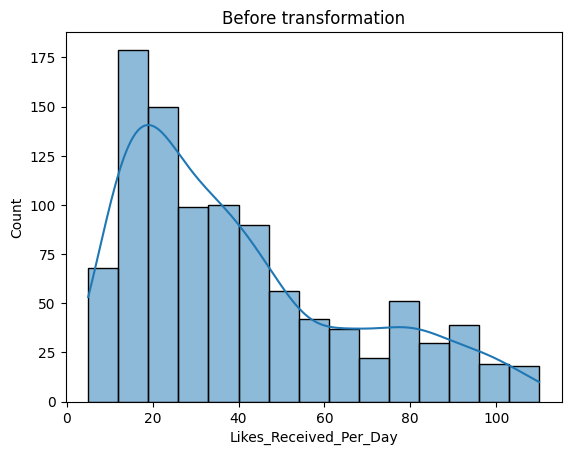

Skewness after: -0.04825590761227235


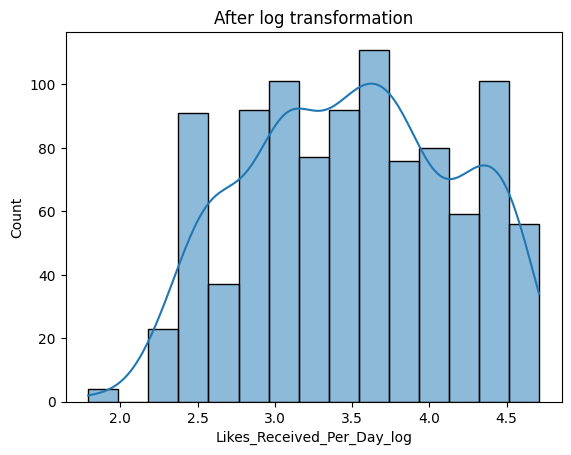

In [ ]:
print("Skewness before:", df_encoded['Likes_Received_Per_Day'].skew())

# Plot original distribution
sns.histplot(df_encoded['Likes_Received_Per_Day'], kde=True)
plt.title("Before transformation")
plt.show()

# Apply log transformation (log1p handles zero and small values safely)
df_encoded['Likes_Received_Per_Day_log'] = np.log1p(df_encoded['Likes_Received_Per_Day'])

# Check skewness after
print("Skewness after:", df_encoded['Likes_Received_Per_Day_log'].skew())

# Plot transformed distribution
sns.histplot(df_encoded['Likes_Received_Per_Day_log'], kde=True)
plt.title("After log transformation")
plt.show()

Skewness before: 0.6089420488654405


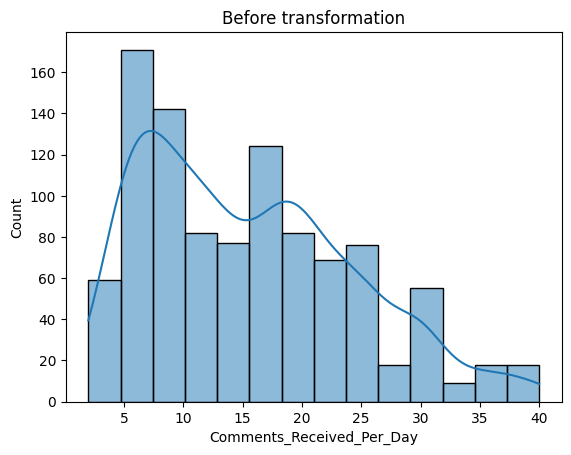

Skewness after: -0.2862227187176769


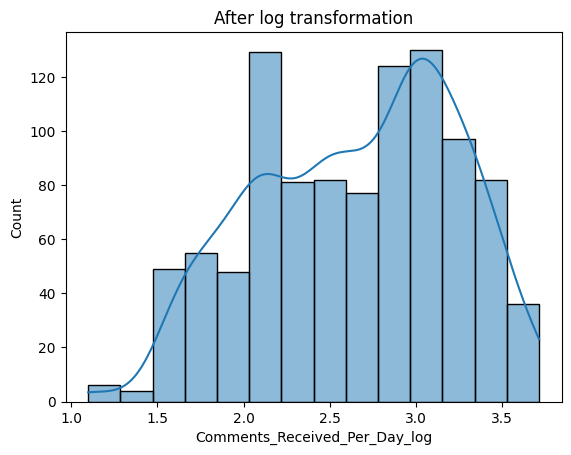

In [ ]:
print("Skewness before:", df_encoded['Comments_Received_Per_Day'].skew())

# Plot original distribution
sns.histplot(df_encoded['Comments_Received_Per_Day'], kde=True)
plt.title("Before transformation")
plt.show()

# Apply log transformation (log1p handles zero and small values safely)
df_encoded['Comments_Received_Per_Day_log'] = np.log1p(df_encoded['Comments_Received_Per_Day'])

# Check skewness after
print("Skewness after:", df_encoded['Comments_Received_Per_Day_log'].skew())

# Plot transformed distribution
sns.histplot(df_encoded['Comments_Received_Per_Day_log'], kde=True)
plt.title("After log transformation")
plt.show()

Skewness before: 0.6845629864871363


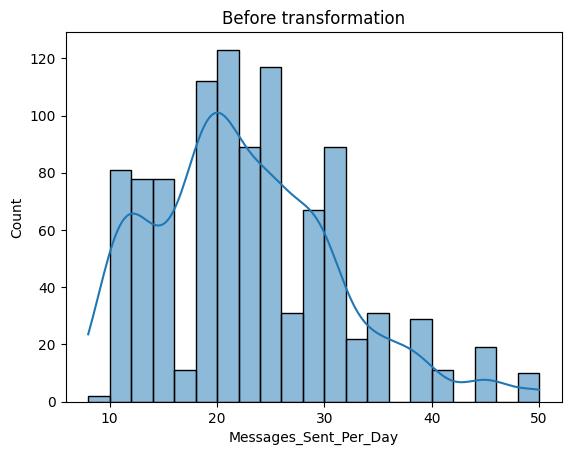

Skewness after: -0.1788000870523648


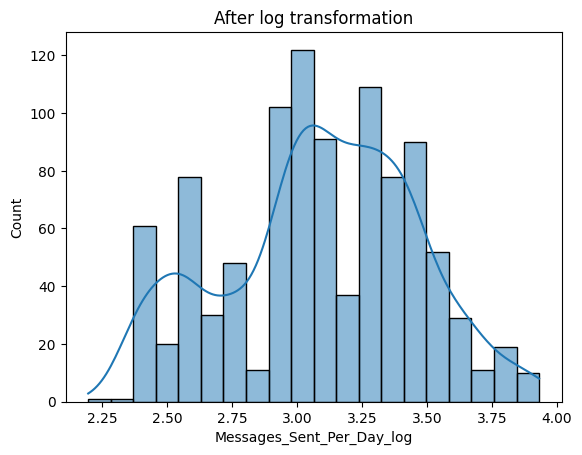

In [ ]:
print("Skewness before:", df_encoded['Messages_Sent_Per_Day'].skew())

# Plot original distribution
sns.histplot(df_encoded['Messages_Sent_Per_Day'], kde=True)
plt.title("Before transformation")
plt.show()

# Apply log transformation (log1p handles zero and small values safely)
df_encoded['Messages_Sent_Per_Day_log'] = np.log1p(df_encoded['Messages_Sent_Per_Day'])

# Check skewness after
print("Skewness after:", df_encoded['Messages_Sent_Per_Day_log'].skew())

# Plot transformed distribution
sns.histplot(df_encoded['Messages_Sent_Per_Day_log'], kde=True)
plt.title("After log transformation")
plt.show()

In [ ]:
from google.colab import files
df_encoded.to_csv('df_encoded.csv', encoding = 'utf-8-sig')
files.download('df_encoded.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-29-682023312b06>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


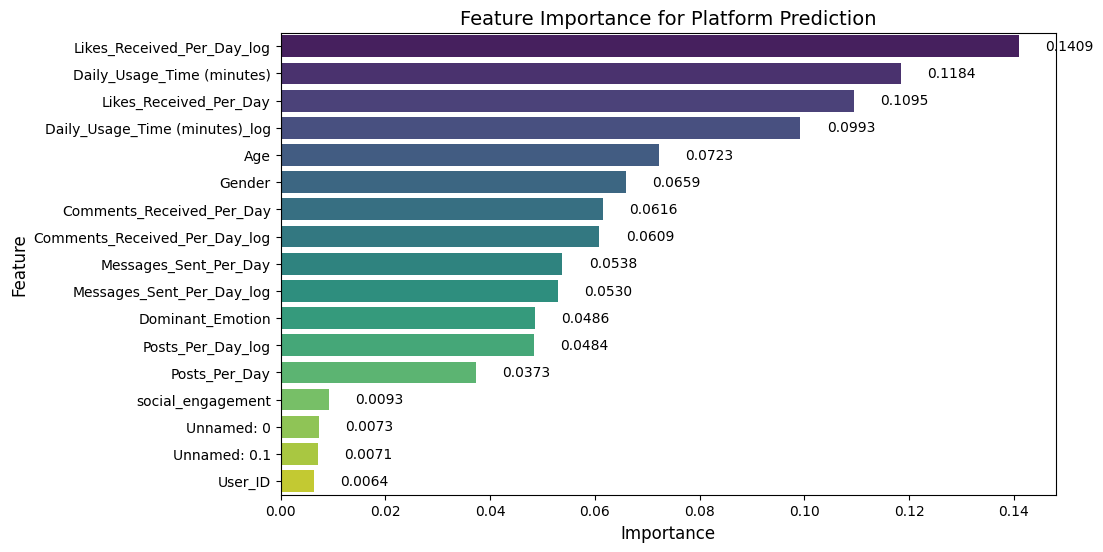

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df_encoded = pd.read_csv('/content/drive/MyDrive/datathon_datasets/social_engagement_unskewed.csv')

# Define features (X) and target variable (y)
X = df_encoded.drop('Platform', axis=1)  # Assuming 'Platform' is the target variable
y = df_encoded['Platform']

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")

# Add values in front of each bar
for index, value in enumerate(feature_importances['Importance']):
    ax.text(value + 0.005, index, f'{value:.4f}', va='center', fontsize=10)

# Titles and labels
plt.title('Feature Importance for Platform Prediction', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()



In [30]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/datathon_datasets/df_encoded_unskewed.csv')

In [31]:
# Create 'social_engagement' column by summing specified columns
df['social_engagement'] = df['Daily_Usage_Time (minutes)_log'] + df['Posts_Per_Day_log'] + df['Likes_Received_Per_Day_log']

# Normalize 'social_engagement' to a range of 1 to 5
min_engagement = df['social_engagement'].min()
max_engagement = df['social_engagement'].max()

df['social_engagement'] = 1 + 4 * (df['social_engagement'] - min_engagement) / (max_engagement - min_engagement)

# Round to the nearest integer within the 1-5 range
df['social_engagement'] = df['social_engagement'].apply(lambda x: int(round(x)))
df['social_engagement'] = df['social_engagement'].clip(1,5)

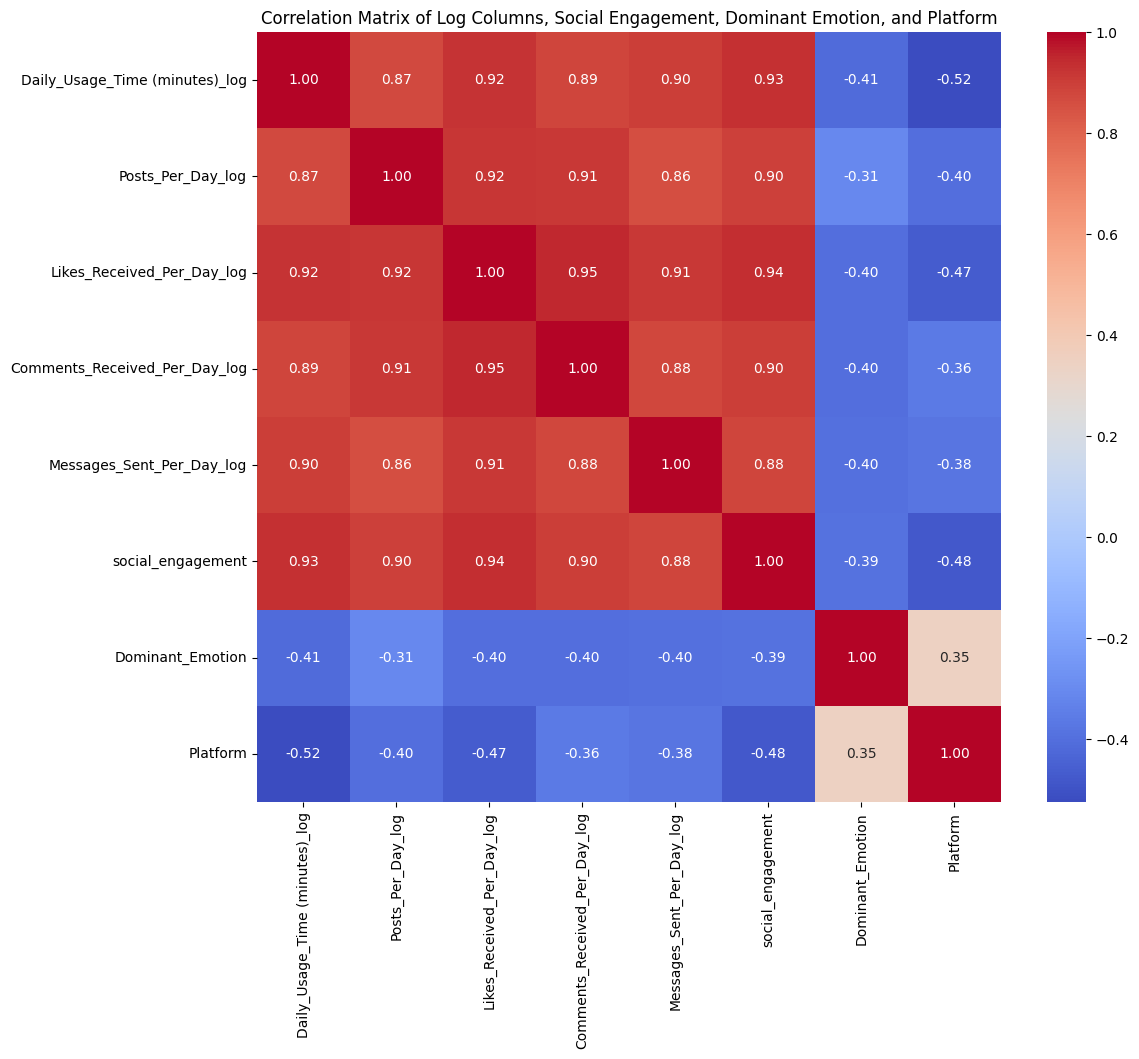

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select log columns, 'social_engagement', 'dominant_emotion_int', and 'Platform'
log_columns = [col for col in df.columns if '_log' in col]  # Efficiently select log columns
selected_columns = log_columns + ['social_engagement', 'Dominant_Emotion', 'Platform']
correlation_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Log Columns, Social Engagement, Dominant Emotion, and Platform')
plt.show()

In [33]:
dv=pd.read_csv('/content/drive/MyDrive/datathon_datasets/validate_encoded.csv')

In [34]:
dt=pd.read_csv('/content/drive/MyDrive/datathon_datasets/testing_unskewed_final.csv')

In [35]:
# Create 'social_engagement' column by summing specified columns
df['social_engagement_unlog'] = df['Daily_Usage_Time (minutes)'] + df['Posts_Per_Day'] + df['Likes_Received_Per_Day']

# Normalize 'social_engagement' to a range of 1 to 5
min_engagement = df['social_engagement_unlog'].min()
max_engagement = df['social_engagement_unlog'].max()

df['social_engagement_unlog'] = 1 + 4 * (df['social_engagement_unlog'] - min_engagement) / (max_engagement - min_engagement)

# Round to the nearest integer within the 1-5 range
df['social_engagement_unlog'] = df['social_engagement_unlog'].apply(lambda x: int(round(x)))
df['social_engagement_unlog'] = df['social_engagement_unlog'].clip(1,5)


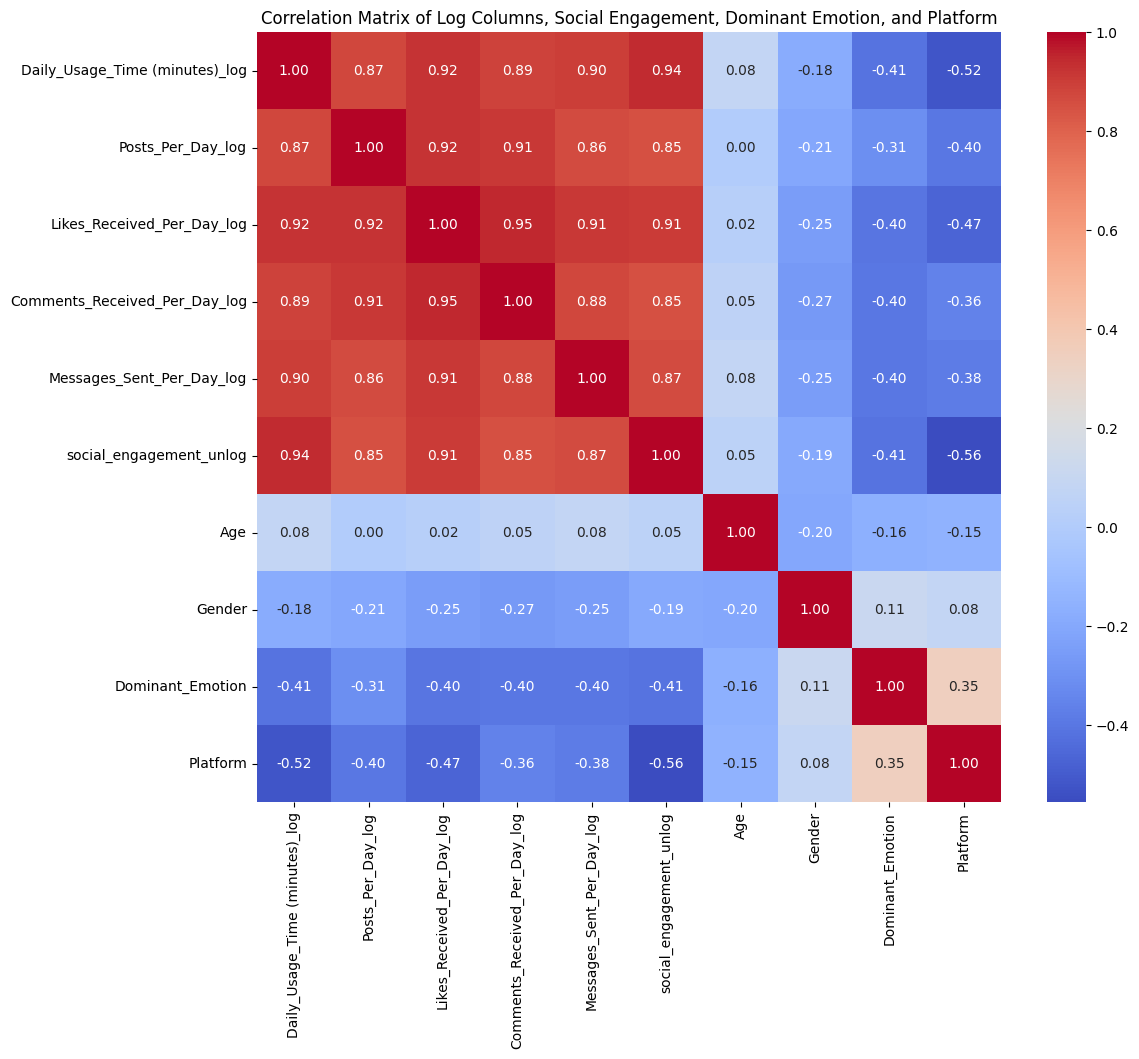

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select log columns, 'social_engagement', 'dominant_emotion_int', and 'Platform'
log_columns = [col for col in df.columns if '_log' in col]  # Efficiently select log columns
selected_columns = log_columns + ['social_engagement_unlog','Age','Gender', 'Dominant_Emotion', 'Platform']
correlation_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Log Columns, Social Engagement, Dominant Emotion, and Platform')
plt.show()

<ipython-input-50-c77845ee3ebe>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="Training Data", shade=True)
<ipython-input-50-c77845ee3ebe>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dt[col], label="Testing Data", shade=True)


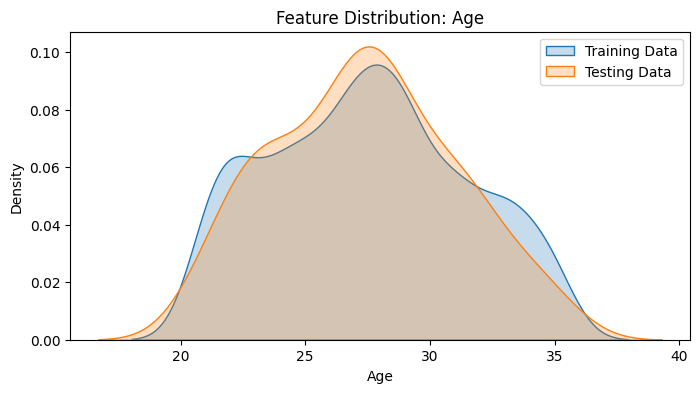

<ipython-input-50-c77845ee3ebe>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="Training Data", shade=True)
<ipython-input-50-c77845ee3ebe>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dt[col], label="Testing Data", shade=True)


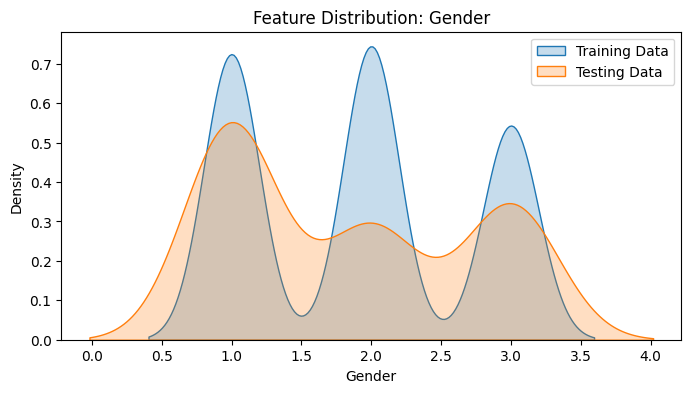

<ipython-input-50-c77845ee3ebe>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="Training Data", shade=True)
<ipython-input-50-c77845ee3ebe>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dt[col], label="Testing Data", shade=True)


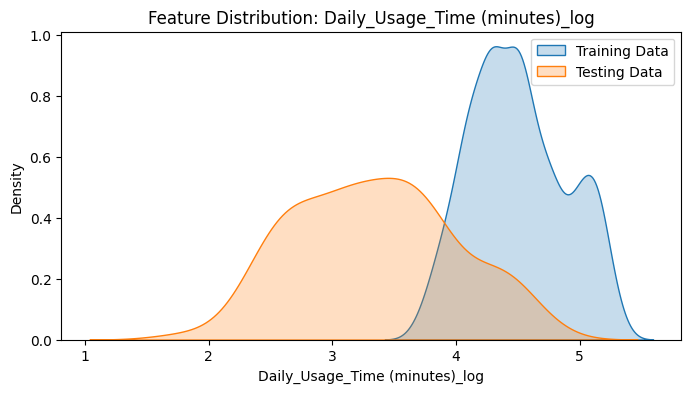

<ipython-input-50-c77845ee3ebe>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="Training Data", shade=True)
<ipython-input-50-c77845ee3ebe>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dt[col], label="Testing Data", shade=True)


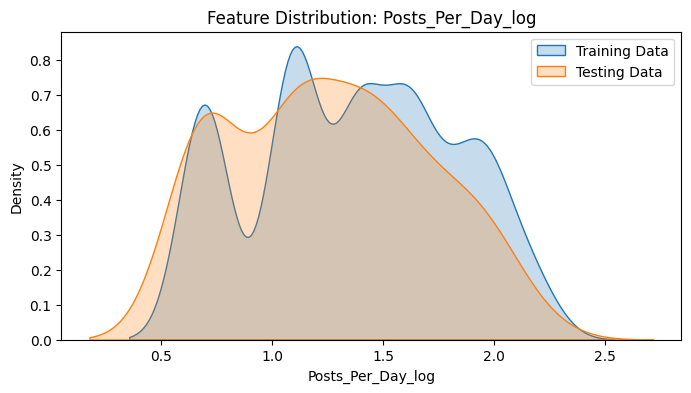

<ipython-input-50-c77845ee3ebe>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="Training Data", shade=True)
<ipython-input-50-c77845ee3ebe>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dt[col], label="Testing Data", shade=True)


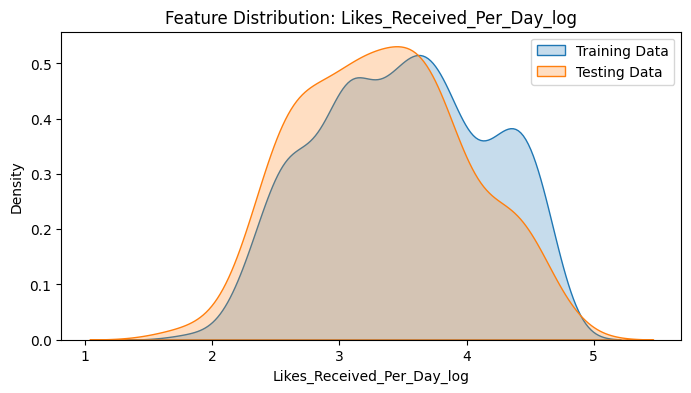

<ipython-input-50-c77845ee3ebe>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="Training Data", shade=True)
<ipython-input-50-c77845ee3ebe>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dt[col], label="Testing Data", shade=True)


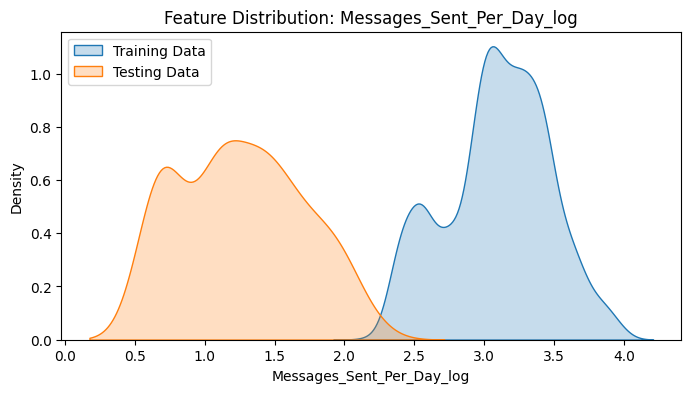

<ipython-input-50-c77845ee3ebe>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="Training Data", shade=True)
<ipython-input-50-c77845ee3ebe>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dt[col], label="Testing Data", shade=True)


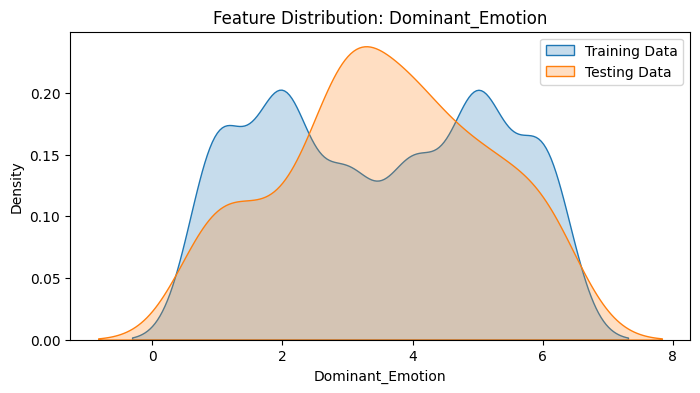

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare feature distributions in training and testing sets
for col in feature_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], label="Training Data", shade=True)
    sns.kdeplot(dt[col], label="Testing Data", shade=True)
    plt.title(f"Feature Distribution: {col}")
    plt.legend()
    plt.show()

In [38]:
# Define feature columns
feature_cols = ['Age', 'Gender', 'Daily_Usage_Time (minutes)_log',
                'Posts_Per_Day_log', 'Likes_Received_Per_Day_log',
                'Messages_Sent_Per_Day_log', 'Dominant_Emotion']

# Training data (ONLY using df)
X_train = df[feature_cols]
y_train = df['Platform']

# Testing data (dt)
X_test = dt[feature_cols]
y_test = dt['Platform']


In [39]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in forest
    'max_depth': [10, 20, 30, None],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples per leaf
    'criterion': ['gini', 'entropy']         # Split criteria
}

# Initialize Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all CPU cores
    verbose=2           # Print progress
)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Feature Scaling (helps performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Improved Hyperparameters for Higher Accuracy
best_rf_model = RandomForestClassifier(
    n_estimators=300,          # More trees for stability
    max_depth=None,            # Let tree grow fully
    min_samples_split=5,       # Prevent overfitting
    min_samples_leaf=2,        # More generalization
    class_weight="balanced",   # Handle class imbalance
    random_state=42,
    bootstrap=True,            # Improve generalization
    max_features='sqrt'        # Reduce overfitting
)

# Train the model with enhanced hyperparameters
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Random Forest Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

joblib.dump(best_rf_model.fit, '/content/rf_model.pkl')


Improved Random Forest Accuracy: 0.6796116504854369
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       1.00      0.75      0.86         4
           3       0.79      0.73      0.76        15
           4       0.66      0.76      0.70        25
           5       0.67      0.42      0.52        19
           6       1.00      0.23      0.38        13
           7       0.41      1.00      0.58        11

    accuracy                           0.68       103
   macro avg       0.79      0.69      0.68       103
weighted avg       0.76      0.68      0.67       103



['/content/rf_model.pkl']

In [52]:
!pip install gradio  # Install Gradio if not already installed
import gradio as gr  # Import Gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.5 MB/s eta 0:00:00


In [53]:
import gradio as gr
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier

# Load trained model (ensure you have a saved model file)
model = joblib.load("/content/rf_model.pkl")  # Update the path to your trained model

# Define feature columns (update as per your dataset)
feature_cols = ['Age', 'Gender', 'Daily_Usage_Time (minutes)_log',
                'Posts_Per_Day_log', 'Likes_Received_Per_Day_log',
                'Messages_Sent_Per_Day_log', 'Dominant_Emotion']

# Define a function to make predictions
def predict_platform(age, gender, usage_time, posts, likes, messages, emotion):
    # Create a DataFrame with user input
    input_data = pd.DataFrame([[age, gender, usage_time, posts, likes, messages, emotion]],
                              columns=feature_cols)

    # Get prediction
    prediction = model.predict(input_data)[0]

    return f"Predicted Social Media Platform: {prediction}"

# Create a Gradio UI
ui = gr.Interface(
    fn=predict_platform,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Number(label="Daily Usage Time (minutes) (log)"),
        gr.Number(label="Posts Per Day (log)"),
        gr.Number(label="Likes Received Per Day (log)"),
        gr.Number(label="Messages Sent Per Day (log)"),
        gr.Number(label="Dominant Emotion")  # If categorical, use a dropdown
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Social Media Platform Predictor",
    description="Enter details to predict which social media platform you are most likely to use."
)

# Launch the UI
ui.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://56841cfbaaa57c04f7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
